In [1]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('qt_dataset.csv', encoding='latin-1')

# Hiển thị 5 dòng đầu tiên của dữ liệu
print(data.head())

  ID  Oxygen  PulseRate  Temperature    Result
0  0    98.0       65.0         95.0  Negative
1  1    96.0       92.0         95.0  Negative
2  2    95.0       92.0         99.0  Negative
3  3    97.0       56.0         96.0  Negative
4  4    88.0       94.0         98.0  Positive


In [2]:
# data.dropna()

# Chuyển đổi cột Temperature từ độ F sang độ C
data['Temperature'] = (data['Temperature'] - 32) * 5/9

# Chuyển đổi cột Result từ dạng text sang dạng số
# Thay thế các giá trị NaN bằng 0 trước khi chuyển đổi kiểu dữ liệu
data['Result'] = data['Result'].map({'Negative': 0, 'Positive': 1}).fillna(0).astype(int)

In [3]:
print(data.head())

  ID  Oxygen  PulseRate  Temperature  Result
0  0    98.0       65.0    35.000000       0
1  1    96.0       92.0    35.000000       0
2  2    95.0       92.0    37.222222       0
3  3    97.0       56.0    35.555556       0
4  4    88.0       94.0    36.666667       1


In [4]:
X = data[['Oxygen', 'PulseRate', 'Temperature']]
Y = data['Result']

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=1)

Epoch 1/150


671/671 [==============================] - 3s 3ms/step - loss: 0.7099 - accuracy: 0.6013 - val_loss: 0.6217 - val_accuracy: 0.6268
Epoch 2/150
671/671 [==============================] - 1s 2ms/step - loss: 0.5841 - accuracy: 0.6792 - val_loss: 0.5447 - val_accuracy: 0.7673
Epoch 3/150
671/671 [==============================] - 2s 3ms/step - loss: 0.4673 - accuracy: 0.8032 - val_loss: 0.3865 - val_accuracy: 0.8616
Epoch 4/150
671/671 [==============================] - 4s 5ms/step - loss: 0.3413 - accuracy: 0.8572 - val_loss: 0.3467 - val_accuracy: 0.8297
Epoch 5/150
671/671 [==============================] - 3s 4ms/step - loss: 0.2950 - accuracy: 0.8642 - val_loss: 0.2834 - val_accuracy: 0.8755
Epoch 6/150
671/671 [==============================] - 2s 3ms/step - loss: 0.2842 - accuracy: 0.8724 - val_loss: 0.2767 - val_accuracy: 0.8737
Epoch 7/150
671/671 [==============================] - 2s 3ms/step - loss: 0.2799 - accuracy: 0.8676 - val_loss: 0.2690 - val_accuracy: 0.87

In [8]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


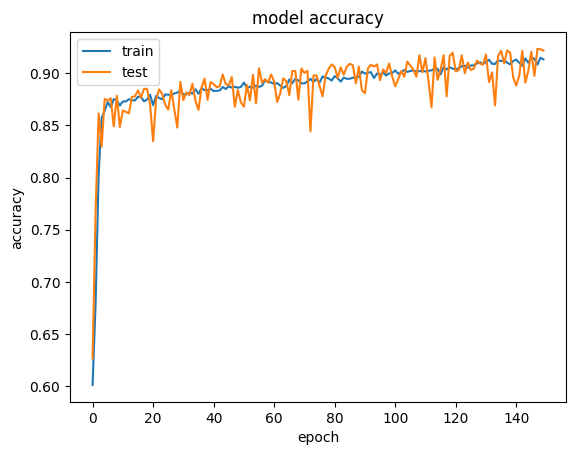

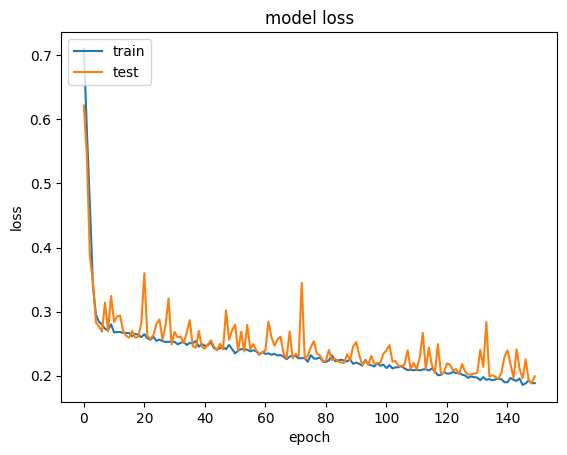

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
# Tạo một DataFrame mới với các giá trị Oxygen, PulseRate và Temperature
new_sample = pd.DataFrame({
    'Oxygen': [70],
    'PulseRate': [95],  
    'Temperature': [39]  
})

prediction = model.predict(new_sample)

# In ra xác suất bị COVID-19
print(prediction)

1/1 [==============================] - 0s 158ms/step
[[0.9999995]]


In [11]:
model.save("model.h5")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from flask import Flask, request, json, jsonify
from keras.models import load_model

app = Flask(__name__)

filename = "model.h5"
model = load_model(filename)


@app.route("/predict", methods=["POST"])
def predict():
    feature = request.json
    sample = pd.DataFrame({
    'Oxygen': [feature['spo2']],
    'PulseRate': [feature['bpm']],  
    'Temperature': [feature['temp']]  
    })
    prediction = model.predict(sample)
    response = {}
    response["result"] = float(prediction)
    return jsonify(response)


if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.8:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 161ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:05:42] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 51ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:06:12] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 50ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:06:20] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 87ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:08:06] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 39ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:08:57] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 42ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:14:40] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 41ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:14:54] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 57ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:15:30] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 35ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:16:19] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 33ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:16:29] "POST /predict HTTP/1.1" 200 -


1/1 [==============================] - 0s 42ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_55156\1994611631.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  response["result"] = float(prediction)
127.0.0.1 - - [23/Dec/2023 23:17:00] "POST /predict HTTP/1.1" 200 -
